# Problem Statement : To predict the plant species based on sepal and petal lengths. The species used in this dataset are iris-setosa, iris-versicolor, iris-virginica. 
This example is part of the University of California - Irvine Machine Learning Repository.

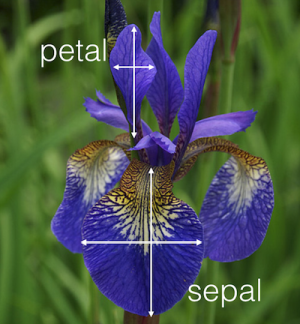

In [118]:
# Importing the libraries we are going to use in this example.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [119]:
# Load the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
names = ['Sepal-Length', 'Sepal-Width', 'Petal-Length', 'Petal-Width', 'Species'] # As the data set has no columns specified 
dataset = pd.read_csv(url, names=names)

## Exploratory Data Analysis

In [120]:
# Checking the Shape of the data

dataset.shape

(150, 5)

In [121]:
# Checking the data present in the data set

dataset.head()

,Sepal-Length,Sepal-Width,Petal-Length,Petal-Width,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [122]:
# Check the summary of each attribute this includes the count, mean, the min and max values as well as some percentiles.

dataset.describe()

,Sepal-Length,Sepal-Width,Petal-Length,Petal-Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


We can see that all of the numerical values have the same scale (centimeters) and similar ranges between 0 and 8 centimeters.

In [123]:
#checking if there is any inconsistency in the dataset

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
Sepal-Length    150 non-null float64
Sepal-Width     150 non-null float64
Petal-Length    150 non-null float64
Petal-Width     150 non-null float64
Species         150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


as we see there are no null values in the dataset


In [124]:
#number of records per species

dataset.Species.value_counts()

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        50
Name: Species, dtype: int64

#  Data Visualization

#### Plot relationship between the sepal length and width

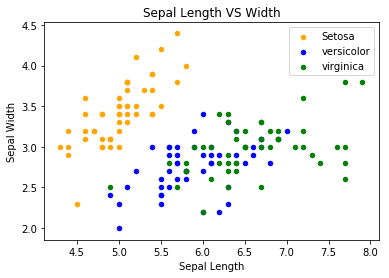

In [125]:
fig = dataset[dataset.Species=='Iris-setosa'].plot(kind='scatter',x='Sepal-Length',y='Sepal-Width',color='orange', label='Setosa')
dataset[dataset.Species=='Iris-versicolor'].plot(kind='scatter',x='Sepal-Length',y='Sepal-Width',color='blue', label='versicolor',ax=fig)
dataset[dataset.Species=='Iris-virginica'].plot(kind='scatter',x='Sepal-Length',y='Sepal-Width',color='green', label='virginica', ax=fig)
fig.set_xlabel("Sepal Length")
fig.set_ylabel("Sepal Width")
fig.set_title("Sepal Length VS Width")
plt.show()

#### Plot relationship between the petal width and length

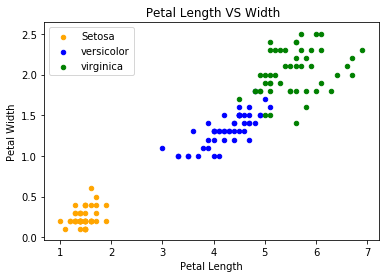

In [126]:
fig = dataset[dataset.Species=='Iris-setosa'].plot.scatter(x='Petal-Length',y='Petal-Width',color='orange', label='Setosa')
dataset[dataset.Species=='Iris-versicolor'].plot.scatter(x='Petal-Length',y='Petal-Width',color='blue', label='versicolor',ax=fig)
dataset[dataset.Species=='Iris-virginica'].plot.scatter(x='Petal-Length',y='Petal-Width',color='green', label='virginica', ax=fig)
fig.set_xlabel("Petal Length")
fig.set_ylabel("Petal Width")
fig.set_title(" Petal Length VS Width")
plt.show()

As we can see that the Petal Features are giving a better cluster division compared to the Sepal features. This is an indication that the Petals can help in better and accurate Predictions over the Sepal

### Now let us see how are the length and width are distributed

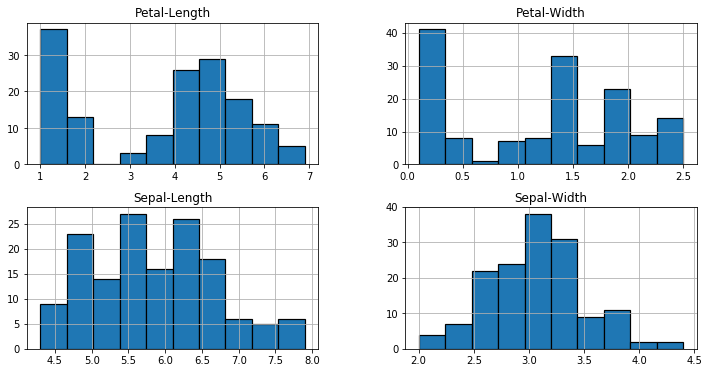

In [127]:
dataset.hist(edgecolor='black', linewidth=1.2)
fig=plt.gcf()
fig.set_size_inches(12,6)
plt.show()


Now the above given problem is a classification problem.. 

Thus we will be using the classification algorithms to build a model.

Classification: samples belong to two or more classes and we want to learn from already labeled data how to predict the class of unlabeled data

Regression: if the desired output consists of one or more continuous variables, then the task is called regression. 
An example of a regression problem would be the prediction of the length of a salmon as a function of its age and weight.

In [128]:
# Importing Machine Learning libraries to use the various classification algorithms

from sklearn.linear_model import LogisticRegression  # for Logistic Regression algorithm
from sklearn.model_selection import train_test_split #to split the dataset for training and testing
from sklearn import metrics #for checking the model accuracy


#### Steps To Be followed When Applying an Algorithm :

1) Split the dataset into training and testing dataset. 

2) The testing dataset is generally smaller than training one as it will help in training the model better.

3) Select any algorithm based on the problem (classification or regression) whatever you feel may be good.

4) Then pass the training dataset to the algorithm to train it. We use the .fit() method

5) Then pass the testing data to the trained algorithm to predict the outcome. We use the .predict() method.

6) We then check the accuracy by passing the predicted outcome and the actual output to the model.

In [157]:
# separating the features and the target variable.

X = dataset.iloc[:,0:4].values
Y = dataset.iloc[:,4].values

# Splitting the data into training and testing

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size= 0.3, random_state=0)

In [158]:
# Training the model

model = LogisticRegression()

model.fit(X_train,y_train)

model.score(X_train, y_train)

0.9428571428571428

In [159]:
# Testing the model

prediction=model.predict(X_test)

In [160]:
print('The accuracy of the Logistic Regression is',metrics.accuracy_score(prediction,y_test))

The accuracy of the Logistic Regression is 0.8888888888888888


In [161]:
# Evaluating the model performance

from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,prediction)


array([[16,  0,  0],
       [ 0, 13,  5],
       [ 0,  0, 11]], dtype=int64)

The confusion matrix provides an indication of the errors made.

## -------End of Logistic Regression-------

In [162]:
from sklearn.neighbors import KNeighborsClassifier
model2 = KNeighborsClassifier(n_neighbors=5)
model2.fit(X_train,y_train)
model2.score(X_train, y_train)

0.9714285714285714

In [163]:
prediction2  = model2.predict(X_test)

In [164]:
print('The accuracy of the KNN is',metrics.accuracy_score(prediction2,y_test))

The accuracy of the Logistic Regression is 0.9777777777777777
